In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [93]:
final_data_train = pd.read_csv("/home/siavash/Downloads/FinalExplainedAcousticNIH/train_labels.csv")
final_data_train

,uid,diagnosis_control,diagnosis_mci,diagnosis_adrd
0,aaop,0.0,1.0,0.0
1,abgk,1.0,0.0,0.0
2,ablf,1.0,0.0,0.0
3,acad,1.0,0.0,0.0
4,acis,0.0,1.0,0.0
...,...,...,...,...
1641,zxtj,1.0,0.0,0.0
1642,zyps,0.0,1.0,0.0
1643,zytb,1.0,0.0,0.0
1644,zyzb,1.0,0.0,0.0


In [94]:
final_data_test = pd.read_csv("/home/siavash/Downloads/FinalExplainedAcousticNIH/acoustic_test_labels.csv")
final_data_test

,uid,diagnosis_control,diagnosis_mci,diagnosis_adrd
0,aazd,1.0,0.0,0.0
1,acdn,1.0,0.0,0.0
2,adoi,1.0,0.0,0.0
3,agiy,1.0,0.0,0.0
4,agni,1.0,0.0,0.0
...,...,...,...,...
407,ztlq,1.0,0.0,0.0
408,ztzl,0.0,0.0,1.0
409,zvqb,1.0,0.0,0.0
410,zwye,1.0,0.0,0.0


In [95]:
final_data_label = pd.concat([final_data_train, final_data_test])
final_data_label

,uid,diagnosis_control,diagnosis_mci,diagnosis_adrd
0,aaop,0.0,1.0,0.0
1,abgk,1.0,0.0,0.0
2,ablf,1.0,0.0,0.0
3,acad,1.0,0.0,0.0
4,acis,0.0,1.0,0.0
...,...,...,...,...
407,ztlq,1.0,0.0,0.0
408,ztzl,0.0,0.0,1.0
409,zvqb,1.0,0.0,0.0
410,zwye,1.0,0.0,0.0


In [96]:
final_metadata1 = pd.read_csv("/home/siavash/Downloads/FinalExplainedAcousticNIH/metadata.csv")
final_metadata1

,uid,age,gender,split,hash,filesize_kb
0,aaop,72,female,train,e4ed5943c8460c2cf324d4a23c7d6fa1,186.144
1,aazd,82,male,test,fc7ef901807e2fb07cfedde8545a7fec,292.272
2,abgk,80,male,train,c6ca4b23c8a920a6ac950dbec2b58059,136.368
3,ablf,64,male,train,c646601370d5d8807f6b15d06fd40dd2,139.896
4,acad,76,female,train,2f0a0eea8caadcc7094af9e91fc88131,290.208
...,...,...,...,...,...,...
2053,zycr,71,male,test,9fca9ea840c1568d6467f286c7b85d20,92.232
2054,zyps,91,female,train,f20a2e2d87b8ac79e8720c58cf30cb1f,251.160
2055,zytb,81,male,train,32851d1de44bf5dc9f68aa6f3d2456fa,260.856
2056,zyzb,81,female,train,b383a211ab1f5da84bfafcb03fdbe402,90.240


In [97]:
final_metadata2 = pd.read_csv("/home/siavash/Downloads/FinalExplainedAcousticNIH/additional_metadata.csv")
final_metadata2

,uid,diagnosis,race,language,handedness,education,corpus
0,aaop,MCI,NaN,english,NaN,NaN,vas
1,aazd,Control,NaN,english,NaN,13,wls
2,abgk,Control,NaN,english,NaN,12,wls
3,ablf,Control,NaN,english,NaN,NaN,pitt
4,acad,Control,NaN,spanish,NaN,6,ivanova
...,...,...,...,...,...,...,...
2053,zycr,Control,NaN,english,NaN,NaN,pitt
2054,zyps,MCI,white,english,right,master's,delaware
2055,zytb,Control,NaN,english,NaN,12,wls
2056,zyzb,Control,NaN,english,NaN,12,wls


In [98]:
final_data = final_metadata2.merge(final_metadata1, on='uid').merge(final_data_label, on='uid')
final_data['label'] = final_data['diagnosis_control'].apply(lambda x : 1 if x == 0 else 0)
final_data['path'] = '/home/siavash/Downloads/FinalExplainedAcousticNIH/' + final_data['split'] + "_audios/" + final_data['uid'] + ".mp3"
final_data['MCL'] = final_data['diagnosis_mci'] + final_data['diagnosis_adrd']*2
final_data

,uid,diagnosis,race,language,handedness,education,corpus,age,gender,split,hash,filesize_kb,diagnosis_control,diagnosis_mci,diagnosis_adrd,label,path,MCL
0,aaop,MCI,NaN,english,NaN,NaN,vas,72,female,train,e4ed5943c8460c2cf324d4a23c7d6fa1,186.144,0.0,1.0,0.0,1,/home/siavash/Downloads/FinalExplainedAcoustic...,1.0
1,aazd,Control,NaN,english,NaN,13,wls,82,male,test,fc7ef901807e2fb07cfedde8545a7fec,292.272,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0
2,abgk,Control,NaN,english,NaN,12,wls,80,male,train,c6ca4b23c8a920a6ac950dbec2b58059,136.368,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0
3,ablf,Control,NaN,english,NaN,NaN,pitt,64,male,train,c646601370d5d8807f6b15d06fd40dd2,139.896,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0
4,acad,Control,NaN,spanish,NaN,6,ivanova,76,female,train,2f0a0eea8caadcc7094af9e91fc88131,290.208,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,zycr,Control,NaN,english,NaN,NaN,pitt,71,male,test,9fca9ea840c1568d6467f286c7b85d20,92.232,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0
2054,zyps,MCI,white,english,right,master's,delaware,91,female,train,f20a2e2d87b8ac79e8720c58cf30cb1f,251.160,0.0,1.0,0.0,1,/home/siavash/Downloads/FinalExplainedAcoustic...,1.0
2055,zytb,Control,NaN,english,NaN,12,wls,81,male,train,32851d1de44bf5dc9f68aa6f3d2456fa,260.856,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0
2056,zyzb,Control,NaN,english,NaN,12,wls,81,female,train,b383a211ab1f5da84bfafcb03fdbe402,90.240,1.0,0.0,0.0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,0.0


In [99]:
# import torch
# import torchaudio
# from torch import nn
# from torch.utils.data import Dataset, DataLoader
# from torch.optim import AdamW
# from transformers import (
#     Wav2Vec2Model,
#     Wav2Vec2FeatureExtractor,
#     get_linear_schedule_with_warmup
# )
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm

# # 1) CONFIGURATION
# MODEL_NAME   = "facebook/wav2vec2-base-960h"  # using base-960h for memory efficiency
# TARGET_SR    = 16000
# BATCH_SIZE   = 7
# INIT_LR      = 1e-2
# EPOCHS       = 5
# DEVICE       = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# NUM_CLASSES  = final_data['MCL'].nunique()  # e.g., 3

# # 2) SPLIT YOUR EXISTING final_data DATAFRAME
# train_df, val_df = train_test_split(
#     final_data,
#     test_size=0.2,
#     stratify=final_data.label,
#     random_state=42
# )

# # 3) LOAD FEATURE EXTRACTOR & BACKBONE
# feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(MODEL_NAME)
# backbone = Wav2Vec2Model.from_pretrained(MODEL_NAME).to(DEVICE)

# # 4) DATASET
# class AudioDataset(Dataset):
#     def __init__(self, df, target_sr):
#         self.df = df.reset_index(drop=True)
#         self.target_sr = target_sr

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         wav, sr = torchaudio.load(row.path)
#         # to mono
#         if wav.size(0) > 1:
#             wav = wav.mean(dim=0, keepdim=True)
#         # resample
#         if sr != self.target_sr:
#             wav = torchaudio.transforms.Resample(sr, self.target_sr)(wav)
#         wav = wav.squeeze(0).numpy()
#         return {
#             "wav": wav,
#             "binary_label": torch.tensor(row.label, dtype=torch.long),
#             "class_label":  torch.tensor(row.MCL,   dtype=torch.long)
#         }

# # 5) MULTI-HEAD CLASSIFIER
# class W2V2MultiHead(nn.Module):
#     def __init__(self, backbone, num_classes):
#         super().__init__()
#         hidden_size = backbone.config.hidden_size
#         self.backbone = backbone
#         self.binary_head = nn.Linear(hidden_size, 2)
#         self.multi_head  = nn.Linear(hidden_size, num_classes)

#     def forward(self, input_values, attention_mask):
#         out = self.backbone(input_values=input_values, attention_mask=attention_mask)
#         pooled = out.last_hidden_state.mean(dim=1)  # (B, hidden_size)
#         return self.binary_head(pooled), self.multi_head(pooled)

# model = W2V2MultiHead(backbone, num_classes=NUM_CLASSES).to(DEVICE)

# # 6) COLLATE_FN: batch-pad via feature_extractor
# def collate_fn(batch):
#     wavs = [b["wav"] for b in batch]
#     bls  = torch.tensor([b["binary_label"] for b in batch], dtype=torch.long)
#     cls  = torch.tensor([b["class_label"]  for b in batch], dtype=torch.long)

#     inputs = feature_extractor(
#         wavs,
#         sampling_rate=TARGET_SR,
#         return_tensors="pt",
#         padding=True,
#         return_attention_mask=True
#     )
#     inputs["binary_labels"] = bls
#     inputs["class_labels"]  = cls
#     return inputs

# # 7) DATALOADERS
# train_loader = DataLoader(
#     AudioDataset(train_df, TARGET_SR),
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     collate_fn=collate_fn
# )
# val_loader = DataLoader(
#     AudioDataset(val_df, TARGET_SR),
#     batch_size=BATCH_SIZE,
#     collate_fn=collate_fn
# )

# # 8) OPTIMIZER, SCHEDULER, LOSS
# optimizer = AdamW(model.parameters(), lr=INIT_LR)
# total_steps = EPOCHS * len(train_loader)
# scheduler = get_linear_schedule_with_warmup(
#     optimizer,
#     num_warmup_steps=int(0.1 * total_steps),
#     num_training_steps=total_steps
# )
# criterion = nn.CrossEntropyLoss()

# # 9) TRAIN & VALIDATE WITH SEPARATE LOSS TRACKING
# for epoch in range(1, EPOCHS + 1):
#     # — Training
#     model.train()
#     train_loss_b, train_loss_m = 0.0, 0.0
#     for batch in tqdm(train_loader, desc=f"Epoch {epoch} Train"):
#         optimizer.zero_grad()
#         iv = batch["input_values"].to(DEVICE)
#         am = batch["attention_mask"].to(DEVICE)
#         bl = batch["binary_labels"].to(DEVICE)
#         cl = batch["class_labels"].to(DEVICE)

#         logits_b, logits_m = model(iv, am)
#         loss_b = criterion(logits_b, bl)
#         loss_m = criterion(logits_m, cl)
#         loss = loss_b + loss_m
#         loss.backward()
#         optimizer.step()
#         scheduler.step()

#         train_loss_b += loss_b.item() * iv.size(0)
#         train_loss_m += loss_m.item() * iv.size(0)

#     avg_train_b = train_loss_b / len(train_loader.dataset)
#     avg_train_m = train_loss_m / len(train_loader.dataset)

#     # — Validation
#     model.eval()
#     val_loss_b, val_loss_m = 0.0, 0.0
#     bin_correct, mul_correct = 0, 0
#     class_counts  = torch.zeros(NUM_CLASSES, dtype=torch.long)
#     class_correct = torch.zeros(NUM_CLASSES, dtype=torch.long)

#     with torch.no_grad():
#         for batch in tqdm(val_loader, desc=f"Epoch {epoch} Val"):
#             iv = batch["input_values"].to(DEVICE)
#             am = batch["attention_mask"].to(DEVICE)
#             bl = batch["binary_labels"].to(DEVICE)
#             cl = batch["class_labels"].to(DEVICE)

#             logits_b, logits_m = model(iv, am)
#             loss_b = criterion(logits_b, bl)
#             loss_m = criterion(logits_m, cl)

#             val_loss_b += loss_b.item() * iv.size(0)
#             val_loss_m += loss_m.item() * iv.size(0)

#             preds_b = logits_b.argmax(dim=-1)
#             preds_m = logits_m.argmax(dim=-1)
#             bin_correct += (preds_b == bl).sum().item()
#             mul_correct += (preds_m == cl).sum().item()

#             for cls_id in range(NUM_CLASSES):
#                 mask = (cl == cls_id)
#                 class_counts[cls_id]  += mask.sum().item()
#                 class_correct[cls_id] += (preds_m[mask] == cls_id).sum().item()

#     avg_val_b = val_loss_b / len(val_loader.dataset)
#     avg_val_m = val_loss_m / len(val_loader.dataset)
#     bin_acc    = bin_correct / len(val_loader.dataset)
#     mul_acc    = mul_correct / len(val_loader.dataset)
#     class_acc = {
#         i: (class_correct[i].item() / class_counts[i].item())
#         if class_counts[i] > 0 else 0.0
#         for i in range(NUM_CLASSES)
#     }

#     print(f"Epoch {epoch:02d}")
#     print(f"  Train Binary Loss: {avg_train_b:.4f} ┃ Train Multi Loss: {avg_train_m:.4f}")
#     print(f"  Val   Binary Loss: {avg_val_b:.4f} ┃ Val   Multi Loss: {avg_val_m:.4f}")
#     print(f"  Binary Acc: {bin_acc:.4f} ┃ Multi Acc: {mul_acc:.4f}")
#     for i, acc in class_acc.items():
#         print(f"    Class {i} Acc: {acc:.4f}")


In [ ]:
import numpy as np
import torch
import librosa
import warnings
from transformers import (
    AutoFeatureExtractor,
    AutoModelForAudioClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from datasets import Dataset
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings('ignore')


class AudioClassifier:
    def __init__(self,
                 model_name="facebook/wav2vec2-base",
                 num_labels=3,
                 augmentations=None):
        """
        Initialize the audio classifier.
        augmentations: subset of ['noise','shift','stretch','pitch','volume','time_mask','freq_mask']
        """
        self.feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
        self.is_ast = "ast" in model_name.lower()
        self.target_length = (
            1024 if self.is_ast
            else self.feature_extractor.sampling_rate * 5
        )
        self.augmentations = augmentations or []

        # Load model and bump dropout in head
        self.model = AutoModelForAudioClassification.from_pretrained(
            model_name,
            num_labels=num_labels,
            ignore_mismatched_sizes=True
        )
        if hasattr(self.model.config, "hidden_dropout_prob"):
            self.model.config.hidden_dropout_prob = 0.3
        if hasattr(self.model.config, "classifier_dropout"):
            self.model.config.classifier_dropout = 0.3

    def load_audio(self, path):
        """Load audio at the extractor's sampling rate."""
        try:
            a, _ = librosa.load(path, sr=self.feature_extractor.sampling_rate)
            return a
        except:
            return None

    def augment(self, x):
        """
        Apply selected augmentations to 1D audio or 2D AST features.
        """
        x = np.array(x, dtype=np.float32)

        if x.ndim == 1:
            # Raw audio augmentations
            if 'noise' in self.augmentations:
                x += 0.005 * np.random.randn(len(x))
            if 'shift' in self.augmentations:
                x = np.roll(x, np.random.randint(-1000, 1000))
            if 'stretch' in self.augmentations:
                rate = np.random.uniform(0.8, 1.2)
                x = librosa.effects.time_stretch(x, rate)
                x = x[:self.target_length] if len(x) > self.target_length else np.pad(x, (0, self.target_length - len(x)))
            if 'pitch' in self.augmentations:
                n = np.random.uniform(-2, 2)
                x = librosa.effects.pitch_shift(x, sr=self.feature_extractor.sampling_rate, n_steps=n)
                x = x[:self.target_length] if len(x) > self.target_length else np.pad(x, (0, self.target_length - len(x)))
            if 'volume' in self.augmentations:
                x *= np.random.uniform(0.8, 1.2)
            if 'time_mask' in self.augmentations:
                t = len(x)
                ml = int(np.random.uniform(0.01, 0.1) * t)
                s = np.random.randint(0, t - ml)
                x[s:s+ml] = 0.0

        else:
            # AST feature augmentations (time × freq)
            if 'noise' in self.augmentations:
                x += 0.005 * np.random.randn(*x.shape)
            if 'shift' in self.augmentations:
                sh = np.random.randint(-x.shape[0] // 10, x.shape[0] // 10)
                x = np.roll(x, sh, axis=0)
            if 'time_mask' in self.augmentations:
                T, F = x.shape
                ml = int(np.random.uniform(0.01, 0.1) * T)
                s = np.random.randint(0, T - ml)
                x[s:s+ml, :] = 0.0
            if 'freq_mask' in self.augmentations:
                T, F = x.shape
                ml = int(np.random.uniform(0.01, 0.1) * F)
                s = np.random.randint(0, F - ml)
                x[:, s:s+ml] = 0.0

        return x

    def preprocess_data(self, df):
        """
        From a DataFrame with ['path','MCL'] produce list of dicts with
        'input_values' (np.float32 array) and 'labels' (int).
        """
        out = []
        for _, row in df.iterrows():
            audio = self.load_audio(row['path'])
            if audio is None:
                continue

            # pad/trim raw audio
            if not self.is_ast:
                if len(audio) > self.target_length:
                    audio = audio[:self.target_length]
                else:
                    audio = np.pad(audio, (0, self.target_length - len(audio)), mode='constant')

            if self.is_ast:
                feats = self.feature_extractor(
                    audio,
                    sampling_rate=self.feature_extractor.sampling_rate,
                    return_tensors="np",
                    padding=True,
                    truncation=True,
                    max_length=self.target_length
                )['input_values'].squeeze()
                arr = feats.astype(np.float32)
            else:
                arr = audio.astype(np.float32)

            out.append({'input_values': arr, 'labels': int(row['MCL'])})
        return out

    def create_dataset(self, processed):
        """
        Build a HuggingFace Dataset and a collator that applies augmentation on the fly.
        """
        def collate_fn(batch):
            xs, ys = [], []
            for itm in batch:
                arr = itm['input_values']
                if self.augmentations:
                    arr = self.augment(arr)
                xs.append(torch.tensor(arr, dtype=torch.float32))
                ys.append(itm['labels'])
            return {
                'input_values': torch.stack(xs),
                'labels': torch.tensor(ys, dtype=torch.long)
            }

        return Dataset.from_list(processed), collate_fn

    def compute_metrics(self, eval_pred):
        """
        Compute accuracy and macro-F1 from model outputs.
        """
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=1)
        rep = classification_report(labels, preds, output_dict=True)
        return {
            'accuracy': accuracy_score(labels, preds),
            'f1': rep['macro avg']['f1-score']
        }

    def train(self, df, output_dir="./results", test_size=0.2):
        processed = self.preprocess_data(df)
        dataset, collator = self.create_dataset(processed)
        splits = dataset.train_test_split(test_size=test_size, seed=42)

        args = TrainingArguments(
            output_dir=output_dir,
            num_train_epochs=10,                # fewer epochs
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            learning_rate=1e-4,                 # lower LR
            weight_decay=0.05,                  # stronger regularization
            warmup_ratio=0.1,                   # warm-up
            max_grad_norm=1.0,                  # gradient clipping
            logging_steps=10,
            eval_strategy="steps",              # evaluate every `eval_steps`
            eval_steps=50,
            save_strategy="steps",              # save every `save_steps`
            save_steps=100,
            load_best_model_at_end=True,
            metric_for_best_model="eval_loss",  # track evaluation loss
            greater_is_better=False,
            report_to=None
        )

        trainer = Trainer(
            model=self.model,
            args=args,
            train_dataset=splits['train'],
            eval_dataset=splits['test'],
            data_collator=collator,
            compute_metrics=self.compute_metrics,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
        )

        trainer.train()
        trainer.save_model()
        self.feature_extractor.save_pretrained(output_dir)
        return trainer, trainer.evaluate()

    def predict(self, path):
        """
        Predict a single file's label & confidence.
        """
        audio = self.load_audio(path)
        if audio is None:
            return None

        if not self.is_ast:
            if len(audio) > self.target_length:
                audio = audio[:self.target_length]
            else:
                audio = np.pad(audio, (0, self.target_length - len(audio)), mode='constant')
            inputs = torch.tensor(audio, dtype=torch.float32).unsqueeze(0)
        else:
            inputs = self.feature_extractor(
                audio,
                sampling_rate=self.feature_extractor.sampling_rate,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=self.target_length
            )['input_values']

        with torch.no_grad():
            out = self.model(input_values=inputs)
            probs = torch.nn.functional.softmax(out.logits, dim=-1)
            pred = torch.argmax(probs, dim=-1).item()
            conf = torch.max(probs).item()

        return {
            'predicted_class': pred,
            'confidence': conf,
            'probabilities': probs.squeeze().cpu().numpy()
        }


# Example usage:
if __name__ == "__main__":
    # final_data: a pandas DataFrame with ['path', 'MCL']
    clf = AudioClassifier(
        model_name="MIT/ast-finetuned-audioset-10-10-0.4593",
        num_labels=3 
    )
    print("Classifier ready!")
    trainer, results = clf.train(final_data)
    print("Final evaluation:", results)


/home/siavash/anaconda3/envs/siavash/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of ASTForAudioClassification were not initialized from the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 and are newly initialized because the shapes did not match:
- classifier.dense.bias: found shape torch.Size([527]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.dense.weight: found shape torch.Size([527, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classifier ready!


Step,Training Loss,Validation Loss,Accuracy,F1
50,0.925000,0.875723,0.538835,0.494222
100,0.924700,0.878600,0.567961,0.529627
150,0.698000,0.905730,0.567961,0.490910
200,0.557300,0.988904,0.526699,0.506710


Final evaluation: {'eval_loss': 0.9889039993286133, 'eval_accuracy': 0.5266990291262136, 'eval_f1': 0.5067102866803921, 'eval_runtime': 20.8904, 'eval_samples_per_second': 19.722, 'eval_steps_per_second': 0.622, 'epoch': 3.8461538461538463}


In [172]:
data1_cc = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/1/ADReSS-IS2020-train/ADReSS-IS2020-data/train/cc_meta_data.csv")
data1_cd = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/1/ADReSS-IS2020-train/ADReSS-IS2020-data/train/cd_meta_data.csv")
data1 = pd.concat([data1_cc, data1_cd])
data1['label'] = (data1['mmse'] < 26).astype(np.int8)
data1['MCL'] = data1['mmse'].apply(lambda x: 0 if x>= 26 else 2 if x < 24 else 1)
data1['age'] = data1['age']*10
data1['path'] = "/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/1/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/" + data1['ID'] + '.wav'
data1.iloc[0]['path']
data1.columns = ['ID','age','sex','mmse','label','MCL','path']
data1

,ID,age,sex,mmse,label,MCL,path
0,S001,70,male,30,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
1,S002,60,female,30,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
2,S003,60,female,29,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
3,S004,70,female,30,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
4,S005,70,female,30,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
...,...,...,...,...,...,...,...
49,S150,50,male,20,1,2,/home/siavash/Downloads/AcousticChallengeFinal...
50,S151,70,male,24,1,1,/home/siavash/Downloads/AcousticChallengeFinal...
51,S153,60,female,12,1,2,/home/siavash/Downloads/AcousticChallengeFinal...
52,S154,60,female,20,1,2,/home/siavash/Downloads/AcousticChallengeFinal...


In [173]:
data3_train = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/3/TAUKADIAL-24-train/TAUKADIAL-24/train/groundtruth.csv")
data3_test = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/3/testgroundtruth.csv")
data3_test_meta = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/3/meta_test.csv")
data3_test = data3_test.merge(data3_test_meta, on='tkdname')
data3 = pd.concat([data3_train, data3_test])
data3['tkdname'] =data3['tkdname'].apply(lambda x: x[:-4])
data3['path'] = '/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/3/audio_files/' +  data3['tkdname'] + '.wav'
data3['label'] = data3['dx'].apply(lambda x : 1 if x == 'MCI' else 0)
data3['MCL'] = data3['mmse'].apply(lambda x: 0 if x>= 26 else 2 if x < 24 else 1)
data3.columns  = ['ID','age','sex','mmse','dx','path','label','MCL']
data3

,ID,age,sex,mmse,dx,path,label,MCL
0,taukdial-002-1,72,F,29,NC,/home/siavash/Downloads/AcousticChallengeFinal...,0,0
1,taukdial-002-2,72,F,29,NC,/home/siavash/Downloads/AcousticChallengeFinal...,0,0
2,taukdial-002-3,72,F,29,NC,/home/siavash/Downloads/AcousticChallengeFinal...,0,0
3,taukdial-003-1,80,M,23,MCI,/home/siavash/Downloads/AcousticChallengeFinal...,1,2
4,taukdial-003-2,80,M,23,MCI,/home/siavash/Downloads/AcousticChallengeFinal...,1,2
...,...,...,...,...,...,...,...,...
115,taukdial-166-2,88,M,28,MCI,/home/siavash/Downloads/AcousticChallengeFinal...,1,0
116,taukdial-166-3,88,M,28,MCI,/home/siavash/Downloads/AcousticChallengeFinal...,1,0
117,taukdial-168-1,65,M,29,NC,/home/siavash/Downloads/AcousticChallengeFinal...,0,0
118,taukdial-168-2,65,M,29,NC,/home/siavash/Downloads/AcousticChallengeFinal...,0,0


In [174]:
data4_train = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/ADReSS-M-train/training-groundtruth.csv")
data4_train_sample= pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/ADReSS-M-train/sample-groundtruth.csv")
data4_sample = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/ADReSS-M-sample-gr/sample-gr-groundtruth.csv")
data4 = pd.concat([data4_train,data4_train_sample,data4_sample])
data4['label'] = data4['dx'].apply(lambda x: 0 if x == 'Control' else 1)
data4['MCL'] = data4['mmse'].apply(lambda x: 0 if x>= 26 else 2 if x < 24 else 1)
data4['path'] = '/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/' + data4['adressfname'] + '.mp3'
data4.columns = ['ID','age','sex','educ','dx','mmse','label','MCL','path']
data4

,ID,age,sex,educ,dx,mmse,label,MCL,path
0,adrso002,70,female,NaN,Control,26.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
1,adrso003,72,female,NaN,Control,30.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
2,adrso004,74,female,NaN,Control,30.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
3,adrso005,67,female,NaN,Control,27.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
4,adrso006,65,female,NaN,Control,28.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
...,...,...,...,...,...,...,...,...,...
3,madrs054,81,Female,17.0,ProbableAD,27.0,1,0,/home/siavash/Downloads/AcousticChallengeFinal...
4,madrs009,60,Female,6.0,Control,29.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...
5,madrs002,78,Female,0.0,ProbableAD,24.0,1,1,/home/siavash/Downloads/AcousticChallengeFinal...
6,madrs081,69,Male,16.0,Control,29.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...


In [175]:
data2_train = pd.read_csv("/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/2/ADReSSo21-diagnosis-train/ADReSSo21/diagnosis/train/adresso-train-mmse-scores.csv")
data2 = data2_train
data2['label'] = data2['dx'].apply(lambda x: 0 if x == 'cn' else 1)
data2['MCL'] = data2['mmse'].apply(lambda x: 0 if x>= 26 else 2 if x < 24 else 1)
data2['path'] = '/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/2/audio_files/' + data2['adressfname'] + '.wav'
data2.drop('Unnamed: 0', axis=1, inplace=True)
data2.columns = ['ID','mmse','dx','label','MCL','path']
data2['language'] = 'english'
data2

,ID,mmse,dx,label,MCL,path,language
0,adrso024,20,ad,1,2,/home/siavash/Downloads/AcousticChallengeFinal...,english
1,adrso025,11,ad,1,2,/home/siavash/Downloads/AcousticChallengeFinal...,english
2,adrso027,18,ad,1,2,/home/siavash/Downloads/AcousticChallengeFinal...,english
3,adrso028,18,ad,1,2,/home/siavash/Downloads/AcousticChallengeFinal...,english
4,adrso031,26,ad,1,0,/home/siavash/Downloads/AcousticChallengeFinal...,english
...,...,...,...,...,...,...,...
161,adrso309,30,cn,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,english
162,adrso310,28,cn,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,english
163,adrso312,29,cn,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,english
164,adrso315,28,cn,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,english


In [176]:
data_del_nl_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/delaware/cl/*.mp3')
data_del_mci_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/delaware/mci/*.mp3')
data_del = pd.DataFrame(data = data_del_nl_list+data_del_mci_list)
data_del.columns = ['path']
data_del['ID'] = data_del['path'].apply(lambda x: x.split('/')[-1][:-4])
data_del['label'] = data_del['path'].apply(lambda x: x.split('/')[-2])
data_del['MCL'] = data_del['label'].apply(lambda x : 1 if x == 'mci' else 0)
data_del['label'] = data_del['label'].apply(lambda x : 1 if x == 'mci' else 0)
data_del['ID'] = 'del_' + data_del['ID']
data_del['language'] = 'english'
data_del.head()

,path,ID,label,MCL,language
0,/home/siavash/Downloads/AcousticChallengeFinal...,del_37-1,0,0,english
1,/home/siavash/Downloads/AcousticChallengeFinal...,del_48-1,0,0,english
2,/home/siavash/Downloads/AcousticChallengeFinal...,del_81-1,0,0,english
3,/home/siavash/Downloads/AcousticChallengeFinal...,del_250-1,0,0,english
4,/home/siavash/Downloads/AcousticChallengeFinal...,del_262-1,0,0,english


In [177]:
data_lu_nl_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/lu/cl/*.mp3')
data_lu_de_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/lu/de/*.mp3')
data_lu = pd.DataFrame(data = data_lu_nl_list+data_lu_de_list)
data_lu.columns = ['path']
data_lu['ID'] = data_lu['path'].apply(lambda x: x.split('/')[-1][:-4])
data_lu['label'] = data_lu['path'].apply(lambda x: x.split('/')[-2])
data_lu['MCL'] = data_lu['label'].apply(lambda x : 2 if x == 'de' else 0)
data_lu['label'] = data_lu['label'].apply(lambda x : 1 if x == 'de' else 0)
data_lu['ID'] = 'lu_' + data_lu['ID']
data_lu['language'] = 'english'
data_lu.head()

,path,ID,label,MCL,language
0,/home/siavash/Downloads/AcousticChallengeFinal...,lu_F53,0,0,english
1,/home/siavash/Downloads/AcousticChallengeFinal...,lu_F49,0,0,english
2,/home/siavash/Downloads/AcousticChallengeFinal...,lu_F35,0,0,english
3,/home/siavash/Downloads/AcousticChallengeFinal...,lu_F45,0,0,english
4,/home/siavash/Downloads/AcousticChallengeFinal...,lu_F43,0,0,english


In [178]:
data_man_nl_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/mandarin/nl/*.mp3')
data_man_de_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/mandarin/mci/*.mp3')
data_man = pd.DataFrame(data = data_man_nl_list+data_man_de_list)
data_man.columns = ['path']
data_man['ID'] = data_man['path'].apply(lambda x: x.split('/')[-1].split('_')[0])
data_man['label'] = data_man['path'].apply(lambda x: x.split('/')[-2])
data_man['MCL'] = data_man['label'].apply(lambda x : 1 if x == 'mci' else 0)
data_man['label'] = data_man['label'].apply(lambda x : 1 if x == 'mci' else 0)
data_man['ID'] = 'man_' + data_man['ID']
data_man['language'] = 'mandarin'
data_man.head()

,path,ID,label,MCL,language
0,/home/siavash/Downloads/AcousticChallengeFinal...,man_012,0,0,mandarin
1,/home/siavash/Downloads/AcousticChallengeFinal...,man_045,0,0,mandarin
2,/home/siavash/Downloads/AcousticChallengeFinal...,man_025,0,0,mandarin
3,/home/siavash/Downloads/AcousticChallengeFinal...,man_056,0,0,mandarin
4,/home/siavash/Downloads/AcousticChallengeFinal...,man_062,0,0,mandarin


In [179]:
data_pitt_nl_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/pitt/cl/*.mp3')
data_pitt_de_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/pitt/de/*.mp3')
data_pitt = pd.DataFrame(data = data_pitt_nl_list+data_pitt_de_list)
data_pitt.columns = ['path']
data_pitt['ID'] = data_pitt['path'].apply(lambda x: x.split('/')[-1][:-4])
data_pitt['label'] = data_pitt['path'].apply(lambda x: x.split('/')[-2])
data_pitt['MCL'] = data_pitt['label'].apply(lambda x : 2 if x == 'de' else 0)
data_pitt['label'] = data_pitt['label'].apply(lambda x : 1 if x == 'de' else 0)
data_pitt['ID'] = 'pitt_' + data_pitt['ID']
data_pitt['language'] = 'english'
data_pitt.head()

,path,ID,label,MCL,language
0,/home/siavash/Downloads/AcousticChallengeFinal...,pitt_118-0,0,0,english
1,/home/siavash/Downloads/AcousticChallengeFinal...,pitt_128-2,0,0,english
2,/home/siavash/Downloads/AcousticChallengeFinal...,pitt_086-1,0,0,english
3,/home/siavash/Downloads/AcousticChallengeFinal...,pitt_158-2,0,0,english
4,/home/siavash/Downloads/AcousticChallengeFinal...,pitt_304-1,0,0,english


In [180]:
data_sp_nl_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/spanish/nl/*.mp3')
data_sp_de_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/spanish/ad/*.mp3')
data_sp_mci_list = glob.glob('/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/dementia_data/spanish/mci/*.mp3')
data_sp = pd.DataFrame(data = data_sp_nl_list+data_sp_de_list+data_sp_mci_list)
data_sp.columns = ['path']
data_sp['ID'] = data_sp['path'].apply(lambda x: x.split('/')[-1][:-4])
data_sp['label'] = data_sp['path'].apply(lambda x: x.split('/')[-2])
data_sp['MCL'] = data_sp['label'].apply(lambda x : 2 if x == 'ad' else 1 if x == 'mci' else 0)
data_sp['label'] = data_sp['label'].apply(lambda x : 0 if x == 'nl' else 1)
data_sp['ID'] = 'sp_' + data_sp['ID']
data_sp['language'] = 'spanish'
data_sp.head()

,path,ID,label,MCL,language
0,/home/siavash/Downloads/AcousticChallengeFinal...,sp_HC-W-82-219,0,0,spanish
1,/home/siavash/Downloads/AcousticChallengeFinal...,sp_HC-W-67-60,0,0,spanish
2,/home/siavash/Downloads/AcousticChallengeFinal...,sp_HC-W-58-213,0,0,spanish
3,/home/siavash/Downloads/AcousticChallengeFinal...,sp_HC-W-78-10,0,0,spanish
4,/home/siavash/Downloads/AcousticChallengeFinal...,sp_HC-W-84-312,0,0,spanish


In [181]:
final_data['ID'] = final_data['uid']
final_data[['ID','age','gender','label','MCL','path', 'split', 'language']]

,ID,age,gender,label,MCL,path,split,language
0,aaop,72,female,1,1.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,english
1,aazd,82,male,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,test,english
2,abgk,80,male,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,english
3,ablf,64,male,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,english
4,acad,76,female,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,spanish
...,...,...,...,...,...,...,...,...
2053,zycr,71,male,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,test,english
2054,zyps,91,female,1,1.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,english
2055,zytb,81,male,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,english
2056,zyzb,81,female,0,0.0,/home/siavash/Downloads/FinalExplainedAcoustic...,train,english


In [182]:
final_combined_data = pd.concat(
    [data1, data2, data3, data4, data_del, data_lu, data_pitt, data_sp, data_man, final_data[['ID','age','gender','label','MCL','path', 'split','language']]],
    axis=0,            # stack rows
    ignore_index=True, # reset the row index
    sort=False         # don’t sort columns alphabetically
)
final_combined_data['language'].fillna('english', inplace=True)
final_combined_data['split'].fillna('train', inplace=True)
final_combined_data['sex'] = final_combined_data['sex'].astype(str).apply(lambda x: x.lower())
final_combined_data[['label',	'MCL']] = final_combined_data[['label',	'MCL']].astype(int)
final_combined_data

,ID,age,sex,mmse,label,MCL,path,dx,language,educ,gender,split
0,S001,70.0,male,30.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,NaN,english,NaN,NaN,train
1,S002,60.0,female,30.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,NaN,english,NaN,NaN,train
2,S003,60.0,female,29.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,NaN,english,NaN,NaN,train
3,S004,70.0,female,30.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,NaN,english,NaN,NaN,train
4,S005,70.0,female,30.0,0,0,/home/siavash/Downloads/AcousticChallengeFinal...,NaN,english,NaN,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...
4527,zycr,71.0,nan,NaN,0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,NaN,english,NaN,male,test
4528,zyps,91.0,nan,NaN,1,1,/home/siavash/Downloads/FinalExplainedAcoustic...,NaN,english,NaN,female,train
4529,zytb,81.0,nan,NaN,0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,NaN,english,NaN,male,train
4530,zyzb,81.0,nan,NaN,0,0,/home/siavash/Downloads/FinalExplainedAcoustic...,NaN,english,NaN,female,train


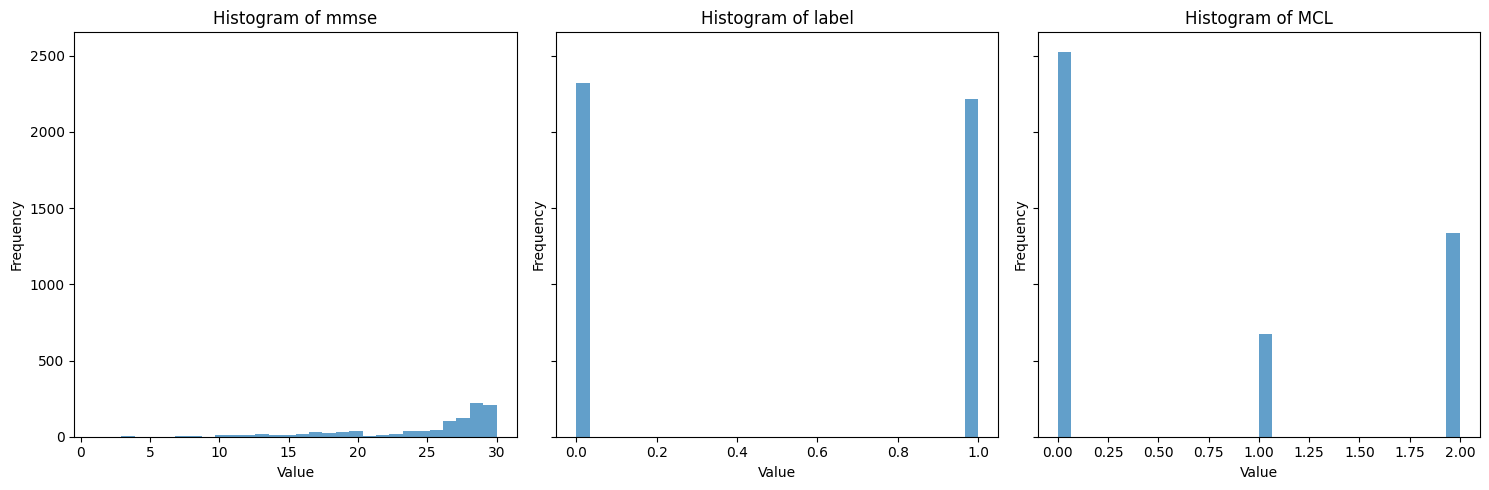

In [183]:
cols = ['mmse', 'label', 'MCL']  # replace with your actual column names

# create 1 row × 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, col in zip(axes, cols):
    ax.hist(final_combined_data[col].dropna(), bins=30, alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

In [185]:
import os
import pandas as pd

# Assume final_combined_data is your existing DataFrame
# and it has a column named 'path' with file paths.

# 1. Create a boolean mask of which files exist
file_exists_mask = final_combined_data['path'].apply(os.path.exists)

# 2. Identify and print the rows with non‐existent paths
nonexistent = final_combined_data.loc[~file_exists_mask, 'path']
if not nonexistent.empty:
    print("These files were not found and will be removed:")
    for missing_path in nonexistent:
        print(missing_path)
else:
    print("All files exist.")

# 3. Drop the rows with missing files and reset the index
final_combined_data=final_combined_data.loc[file_exists_mask].reset_index(drop=True)

# Now final_combined_data contains only rows whose 'path' exists on disk.


These files were not found and will be removed:
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs046.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs097.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs047.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs054.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs009.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs002.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs081.mp3
/home/siavash/Downloads/AcousticChallengeFinalFiles/PREPARE-Acoustic-Track-Competition/data/4/audio_files/madrs087.mp3


In [193]:
import os
import torch
import torchaudio
import pandas as pd
from tqdm import tqdm

# Parameters
target_duration = 30       # seconds
min_remainder = 10         # seconds threshold for padding
output_dir = "/hdd/acoustic_data/patch_30"
os.makedirs(output_dir, exist_ok=True)

# Prepare list to collect new rows
new_rows = []

# Iterate over each row in your DataFrame
for _, row in tqdm(final_combined_data.iterrows()):
    try:
        orig_path = row['path']
        waveform, sr = torchaudio.load(orig_path)  # waveform shape: [channels, samples]
        total_samples = waveform.shape[1]
        chunk_size = target_duration * sr
        min_remainder_samples = min_remainder * sr

        # Compute how many full 30s chunks we can extract
        num_full_chunks = total_samples // chunk_size

        # Process each full chunk
        for chunk_idx in range(num_full_chunks):
            start = chunk_idx * chunk_size
            end = start + chunk_size
            chunk_waveform = waveform[:, start:end]

            # Save chunk
            base, ext = os.path.splitext(os.path.basename(orig_path))
            new_name = f"{base}_chunk{chunk_idx + 1}{ext}"
            new_path = os.path.join(output_dir, new_name)
            torchaudio.save(new_path, chunk_waveform, sr)

            # Append row metadata + new path
            new_row = row.to_dict()
            new_row['processed_path'] = new_path
            new_row['chunk_index'] = chunk_idx + 1
            new_rows.append(new_row)

        # Handle remainder
        remainder_start = num_full_chunks * chunk_size
        remainder_samples = total_samples - remainder_start

        if remainder_samples > min_remainder_samples:
            # extract remainder
            remainder_waveform = waveform[:, remainder_start:]
            # pad to 30s
            pad_amt = chunk_size - remainder_waveform.shape[1]
            pad_tensor = torch.zeros((waveform.shape[0], pad_amt))
            chunk_waveform = torch.cat([remainder_waveform, pad_tensor], dim=1)

            # Save padded chunk
            base, ext = os.path.splitext(os.path.basename(orig_path))
            new_name = f"{base}_chunk{num_full_chunks + 1}{ext}"
            new_path = os.path.join(output_dir, new_name)
            torchaudio.save(new_path, chunk_waveform, sr)

            # Append row metadata + new path
            new_row = row.to_dict()
            new_row['processed_path'] = new_path
            new_row['chunk_index'] = num_full_chunks + 1
            new_rows.append(new_row)
    except:
        continue

# Create updated DataFrame
updated_df = pd.DataFrame(new_rows)

# If you want to preserve original columns and just add processed_path & chunk_index:
# updated_df will have all original columns plus 'processed_path' and 'chunk_index'.

print(updated_df.head())


4524it [34:09,  2.21it/s]

     ID   age     sex  mmse  label  MCL  \
0  S001  70.0    male  30.0      0    0   
1  S001  70.0    male  30.0      0    0   
2  S001  70.0    male  30.0      0    0   
3  S002  60.0  female  30.0      0    0   
4  S002  60.0  female  30.0      0    0   

                                                path   dx language  educ  \
0  /home/siavash/Downloads/AcousticChallengeFinal...  NaN  english   NaN   
1  /home/siavash/Downloads/AcousticChallengeFinal...  NaN  english   NaN   
2  /home/siavash/Downloads/AcousticChallengeFinal...  NaN  english   NaN   
3  /home/siavash/Downloads/AcousticChallengeFinal...  NaN  english   NaN   
4  /home/siavash/Downloads/AcousticChallengeFinal...  NaN  english   NaN   

  gender  split                               processed_path  chunk_index  
0    NaN  train  /hdd/acoustic_data/patch_30/S001_chunk1.wav            1  
1    NaN  train  /hdd/acoustic_data/patch_30/S001_chunk2.wav            2  
2    NaN  train  /hdd/acoustic_data/patch_30/S001_chunk3